In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')

import time

import pulp

In [2]:
import sys
sys.path.insert(0, '../..')

import quan_utils

In [3]:
subset_prob_df = pd.read_csv('../../data/subset_data.csv', index_col=0)
prob_df = pd.read_csv('../../data/data.csv', index_col=0)

In [4]:
subset_prob_df.head()

,HouseholdID,Real,Reentered,ES,PSH,TH,RRH,PREV,Week,Used
1,2028039,2,0,0.425008,0.271801,0.350017,0.397626,0.291637,33,False
2,2036520,2,0,0.327550,0.188743,0.266543,0.337444,0.218234,283,True
3,2108682,2,0,0.186973,0.760772,0.137805,0.178759,0.106168,205,True
4,2116994,2,0,0.234827,0.217690,0.183896,0.239388,0.148293,244,True
5,2154639,2,0,0.299406,0.554693,0.232651,0.265632,0.190321,107,False


In [5]:
subset_prob_df['Used'].value_counts()

True     10129
False     4082
Name: Used, dtype: int64

In [6]:
subset_prob_df = subset_prob_df[subset_prob_df['Used']]
subset_prob_df.shape

(10129, 10)

In [7]:
prob_df['Real'].value_counts()

5    6202
1    4441
3    2451
4     846
2     271
Name: Real, dtype: int64

In [8]:
helper = helper = quan_utils.AssignmentHelper(prob_df=subset_prob_df)
helper.update_constraints(capacity_df=prob_df['Real'].value_counts())

In [9]:
t0 = time.time()
sol_df = helper.ip_solve()
print(f'Took {time.time() - t0:.4f} seconds')
sol_df.head()

Took 13.4702 seconds


,ES,PSH,TH,RRH,PREV
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,1.0


In [10]:
pulp.LpStatus[helper.prob.status]

'Optimal'

In [11]:
sol_df.sum(axis=0)

ES       359.0
PSH      271.0
TH      2451.0
RRH      846.0
PREV    6202.0
dtype: float64

In [12]:
helper.prob_df[helper.types].min(axis=1).sum()

1714.43270462

In [13]:
helper.prob.objective.value()

2302.525906114997

In [14]:
real_n_reentries, bart_n_reentries, uncon_sol_n_reentries = helper.compare_reentry(sol_df)
print(f'Percentage reduction in reentry probability: {(real_n_reentries - uncon_sol_n_reentries) / real_n_reentries * 100}')

prob_compare_df = helper.compare_prob(sol_df)
print(f'Max difference in reentry probability: {prob_compare_df["Diff"].max()}')
print(f'Mean difference in reentry probability: {prob_compare_df["Diff"].mean()}')

Total number of reentered households: 2796
BART-estimated: 2795.9972
Input assignment: 2302.5259
Percentage reduction in reentry probability: 17.649288050250473
Max difference in reentry probability: 0.34084333600000005
Mean difference in reentry probability: -0.04871865940458081


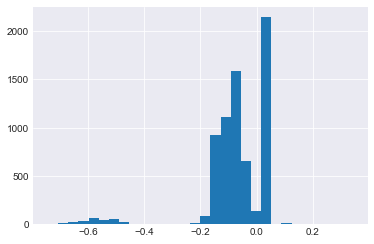

In [15]:
plt.hist(prob_compare_df[prob_compare_df['Diff'] != 0]['Diff'], bins=30)
plt.show()

In [15]:
helper = helper = quan_utils.AssignmentHelper()
helper.update_constraints()

In [16]:
t0 = time.time()
sol_df = helper.ip_solve()
print(f'Took {time.time() - t0:.4f} seconds')
sol_df.head()

Took 20.0518 seconds


,ES,PSH,TH,RRH,PREV
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0


In [17]:
pulp.LpStatus[helper.prob.status]

'Optimal'

In [18]:
sol_df.sum(axis=0)

ES      4441.0
PSH      271.0
TH      2451.0
RRH      846.0
PREV    6202.0
dtype: float64

In [19]:
helper.prob_df[helper.types].min(axis=1).sum()

2497.9808768479998

In [20]:
helper.prob.objective.value()

3627.0456566409853

In [21]:
real_n_reentries, bart_n_reentries, uncon_sol_n_reentries = helper.compare_reentry(sol_df)
print(f'Percentage reduction in reentry probability: {(real_n_reentries - uncon_sol_n_reentries) / real_n_reentries * 100}')

prob_compare_df = helper.compare_prob(sol_df)
print(f'Max difference in reentry probability: {prob_compare_df["Diff"].max()}')
print(f'Mean difference in reentry probability: {prob_compare_df["Diff"].mean()}')

Total number of reentered households: 4082
BART-estimated: 4085.7049
Input assignment: 3627.0457
Percentage reduction in reentry probability: 11.14537832824632
Max difference in reentry probability: 0.48047754
Mean difference in reentry probability: -0.032274946601857736


In [24]:
week_prob_df = pd.read_csv('../../data/subset_data.csv', index_col=0)
unused_prob_df = week_prob_df[~week_prob_df['Used']]

print(unused_prob_df.shape)
unused_prob_df.head()

(4082, 10)


,HouseholdID,Real,Reentered,ES,PSH,TH,RRH,PREV,Week,Used
1,2028039,2,0,0.425008,0.271801,0.350017,0.397626,0.291637,33,False
5,2154639,2,0,0.299406,0.554693,0.232651,0.265632,0.190321,107,False
6,200001080,1,1,0.781217,0.691468,0.764820,0.754706,0.704289,96,False
10,200001171,5,1,0.638970,0.780866,0.555111,0.585469,0.506257,119,False
13,200001212,1,1,0.680390,0.747923,0.607343,0.592242,0.537909,109,False


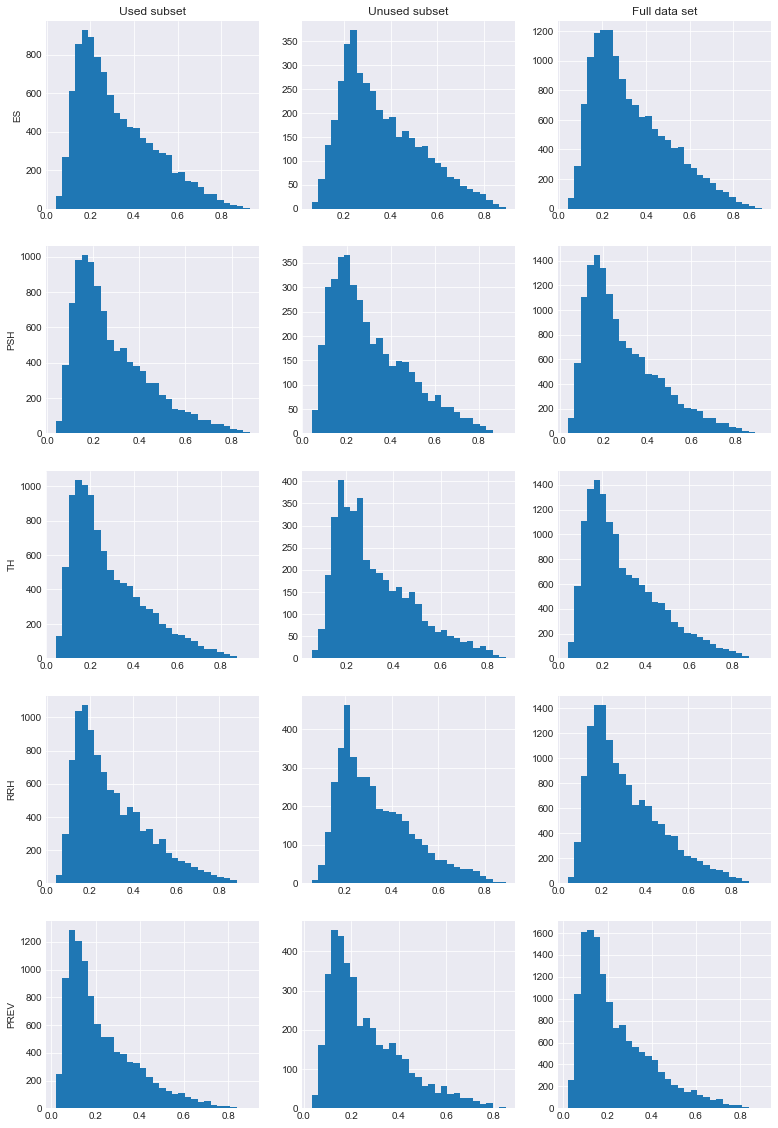

In [28]:
types = ['ES', 'PSH', 'TH', 'RRH', 'PREV']

f, ax = plt.subplots(len(types), 3, figsize=(13, 20))

for type_index, type_ in enumerate(types):
    ax[type_index][0].hist(subset_prob_df[type_], bins=30)
    ax[type_index][1].hist(unused_prob_df[type_], bins=30)
    ax[type_index][2].hist(prob_df[type_], bins=30)
    
    ax[type_index][0].set_ylabel(type_)

ax[0][0].set_title('Used subset')
ax[0][1].set_title('Unused subset')
ax[0][2].set_title('Full data set')

plt.show()

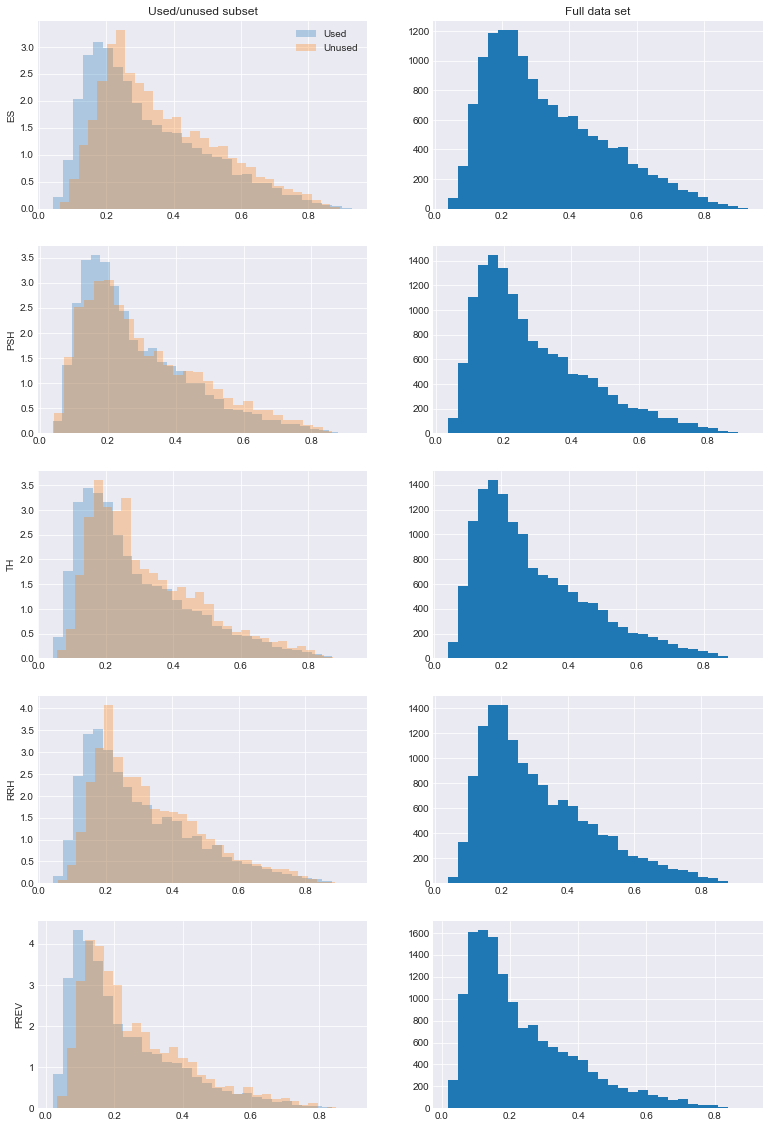

In [32]:
types = ['ES', 'PSH', 'TH', 'RRH', 'PREV']

f, ax = plt.subplots(len(types), 2, figsize=(13, 20))

for type_index, type_ in enumerate(types):
    ax[type_index][0].hist(subset_prob_df[type_], bins=30, alpha=0.3, label='Used', density=True)
    ax[type_index][0].hist(unused_prob_df[type_], bins=30, alpha=0.3, label='Unused', density=True)
    ax[type_index][1].hist(prob_df[type_], bins=30)
    
    ax[type_index][0].set_ylabel(type_)

ax[0][0].set_title('Used/unused subset')
ax[0][1].set_title('Full data set')
ax[0][0].legend()

plt.show()